In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
X, y = data.data, data.target
print(X.shape, y.shape)

(178, 13) (178,)


In [ ]:
print("Features:" ,data.feature_names,"\nTargets:" ,data.target_names)
print("\n\n", data.DESCR)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 
Targets: ['class_0' 'class_1' 'class_2']


 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol: 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

scaler = StandardScaler() # i tried training without standardization but results was not good
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [ ]:
model_1 = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(3, activation='softmax')  # Output layer
])

model_1.compile(
    optimizer='adam',                 # Adam optimizer (adaptive learning rate)
    loss='categorical_crossentropy',
    metrics=['accuracy']              # Track accuracy during training
)


hist = model_1.fit(X_train, y_train, epochs=32, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3942 - loss: 1.1253 - val_accuracy: 0.5741 - val_loss: 0.9945
Epoch 2/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5601 - loss: 0.8943 - val_accuracy: 0.6667 - val_loss: 0.8440
Epoch 3/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7008 - loss: 0.7985 - val_accuracy: 0.7407 - val_loss: 0.7295
Epoch 4/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8761 - loss: 0.5809 - val_accuracy: 0.8333 - val_loss: 0.6457
Epoch 5/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8965 - loss: 0.5312 - val_accuracy: 0.8519 - val_loss: 0.5708
Epoch 6/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9256 - loss: 0.4714 - val_accuracy: 0.8519 - val_loss: 0.5133
Epoch 7/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9536 - loss: 0.4042 - val_accuracy: 0.8519 - val_loss: 0.4625
Epoch 8/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9839 - loss: 0.3523 - val_accuracy: 0.8704 - val_loss

In [ ]:
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9545 - loss: 0.1260
Test Accuracy: 96.30%


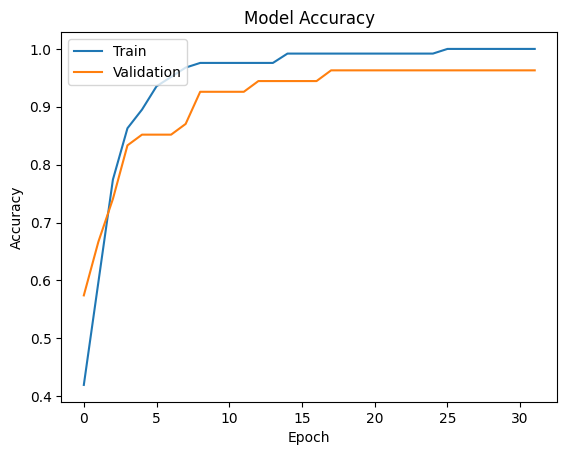

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_2= keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.Dense(3, activation='softmax')  # 3 output classes
])

model_2.compile(
    optimizer='sgd',  # Stochastic Gradient Descent
    loss=tf.keras.losses.KLDivergence(),  # KL Divergence
    metrics=['accuracy']
)
hist = model_2.fit(X_train, y_train, epochs=32, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.1530 - loss: 1.3871 - val_accuracy: 0.4444 - val_loss: 0.9836
Epoch 2/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5270 - loss: 0.9147 - val_accuracy: 0.9074 - val_loss: 0.7023
Epoch 3/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8670 - loss: 0.6622 - val_accuracy: 0.9630 - val_loss: 0.5427
Epoch 4/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9309 - loss: 0.5026 - val_accuracy: 0.9630 - val_loss: 0.4461
Epoch 5/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9385 - loss: 0.3966 - val_accuracy: 0.9630 - val_loss: 0.3820
Epoch 6/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9213 - loss: 0.3685 - val_accuracy: 0.9630 - val_loss: 0.3359
Epoch 7/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9648 - loss: 0.2891 - val_accuracy: 0.9630 - val_loss: 0.3006
Epoch 8/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9674 - loss: 0.2633 - val_accuracy: 0.9815 - val_lo

In [ ]:
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9545 - loss: 0.1194
Test Accuracy: 96.30%


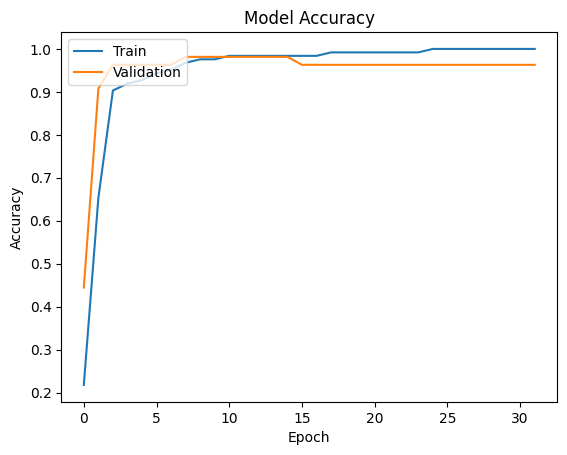

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow import keras

model_3 = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),

    keras.layers.Dense(128),
    keras.layers.LeakyReLU(alpha=0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64),
    keras.layers.LeakyReLU(alpha=0.1),  # LeakyReLU activation
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),  # Prevent overfitting

    keras.layers.Dense(32),
    keras.layers.LeakyReLU(alpha=0.1),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(16),
    keras.layers.LeakyReLU(alpha=0.1),

    keras.layers.Dense(8),
    keras.layers.LeakyReLU(alpha=0.1),

    keras.layers.Dense(3, activation='softmax')
])

model_3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hist = model_3.fit(X_train, y_train, epochs=32, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.3973 - loss: 1.0512 - val_accuracy: 0.7963 - val_loss: 1.0342
Epoch 2/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6765 - loss: 0.8534 - val_accuracy: 0.9259 - val_loss: 0.9366
Epoch 3/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9131 - loss: 0.6241 - val_accuracy: 0.9259 - val_loss: 0.8148
Epoch 4/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8934 - loss: 0.5323 - val_accuracy: 0.9630 - val_loss: 0.6857
Epoch 5/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8891 - loss: 0.4589 - val_accuracy: 0.9630 - val_loss: 0.5605
Epoch 6/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8759 - loss: 0.4000 - val_accuracy: 0.9815 - val_loss: 0.4739
Epoch 7/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9465 - loss: 0.2690 - val_accuracy: 0.9815 - val_loss: 0.4026
Epoch 8/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9710 - loss: 0.2014 - val_accuracy: 0.9815 - val_loss: 0.

In [ ]:
loss, accuracy = model_3.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9772 - loss: 0.0673
Test Accuracy: 98.15%


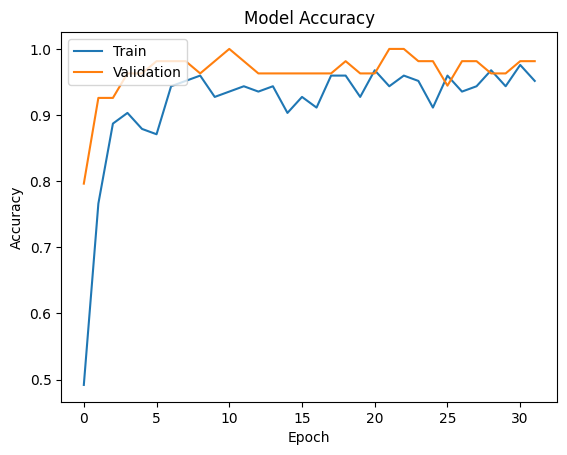

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_4 = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='elu'),  # Exponential Linear Unit (ELU)
    keras.layers.Dense(3, activation='softmax')
])

model_4.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),  # RMSProp for adaptive learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
hist = model_4.fit(X_train, y_train, epochs=32, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7965 - loss: 0.3944 - val_accuracy: 0.8889 - val_loss: 0.3939
Epoch 2/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9857 - loss: 0.0250 - val_accuracy: 0.9630 - val_loss: 0.0576
Epoch 3/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 8.9868e-04 - val_accuracy: 0.9630 - val_loss: 0.0527
Epoch 4/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 5.2939e-04 - val_accuracy: 0.9630 - val_loss: 0.0486
Epoch 5/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 2.2852e-04 - val_accuracy: 0.9815 - val_loss: 0.0531
Epoch 6/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 1.1525e-04 - val_accuracy: 0.9815 - val_loss: 0.0415
Epoch 7/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 8.5523e-05 - val_accuracy: 0.9815 - val_loss: 0.0405
Epoch 8/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 2.7976e-05 - val_acc

In [ ]:
loss, accuracy = model_4.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9877 - loss: 0.0367
Test Accuracy: 98.15%


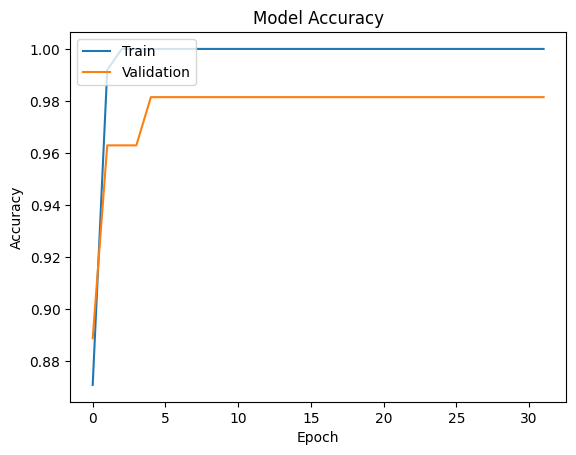

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()